## Keşifçi Veri Analizi 1

### Veriye İlk Bakış

In [1]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
import pandas as pd
df.method=pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [6]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
df.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


In [11]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
df['orbital_period'].fillna(0,inplace=True)

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [16]:
import numpy as np
df['mass'].fillna(np.mean(df.mass),inplace=True)

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

### Kategorik Değişken Özellikleri

In [18]:
kat_df=df.select_dtypes(include=['category'])

In [19]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [20]:
kat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [21]:
kat_df['method'].value_counts().count()

10

In [22]:
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

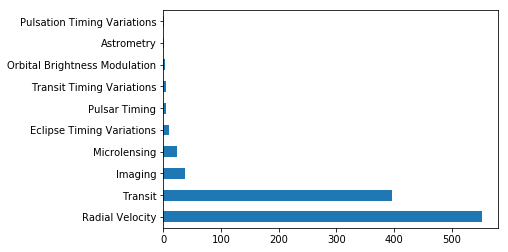

In [24]:
df['method'].value_counts().plot.barh()

In [25]:
from pandas.api.types import CategoricalDtype

In [26]:
kat_df=kat_df.astype(CategoricalDtype(ordered=True))

In [27]:
kat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null category
number            1035 non-null int64
orbital_period    1035 non-null float64
mass              1035 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: category(1), float64(3), int64(2)
memory usage: 42.0 KB


### Sürekli Değişken Özetleri

In [29]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [30]:
df_num=df.select_dtypes(include=['float64','int64'])

In [31]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [32]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000000,2.000000,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884000,487.100000,730000.0
mass,1035.0,2.638161,2.687081,0.0036,1.285000,2.638161,2.638161,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250000,178.500000,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000000,2012.000000,2014.0


In [33]:
df_num['mass'].describe()

count    1035.000000
mean        2.638161
std         2.687081
min         0.003600
25%         1.285000
50%         2.638161
75%         2.638161
max        25.000000
Name: mass, dtype: float64

In [34]:
print("Ortalama:"+ str(df_num['distance'].mean()))
print("Dolu Gözlem Sayısı:"+ str(df_num["distance"].count()))
print("Maksimum Değer:"+str(df_num["distance"].max()))
print("Minimum Değer"+ str(df_num['distance'].min()))
print("Medyan:"+str(df_num["distance"].median()))
print("Standart Sapma:"+ str(df_num["distance"].std()))


Ortalama:264.06928217821786
Dolu Gözlem Sayısı:808
Maksimum Değer:8500.0
Minimum Değer1.35
Medyan:55.25
Standart Sapma:733.1164929404422


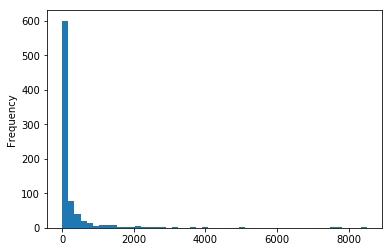

In [35]:
df['distance'].plot.hist(bins=50)

## Dağılım Barplot

Diamonds veri seti:
    
price: dolar cinsinden fiyat ($326 $18,823)
    
carat: ağırlık (0.2-5.01)
    
cut: kalite (Flair, Good, Very Good, Premium, Ideal)
    
color: renk(from J (worst)to D(best))
    
clarity: temizliği, berraklığı
    (I1 (worst), SI2,SI1, VS2, VS1, VVS2, VVS1, IF (best))
    
x: length in mm (0-10.74)

y: width in  mm (0-58.9)
    
z: depth in mm (0-31.8)
    
depth: toplam derinlik yüzdesi=z/ mean(x,y)=2*z / (x+y) (43-79)
    
table: width of top of diamond relative to widest point(43-95)

In [36]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
df.shape

(53940, 10)

In [38]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [40]:
from pandas.api.types import CategoricalDtype

In [44]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))
df.color=df.color.astype(CategoricalDtype(ordered=True))
df.clarity=df.clarity.astype(CategoricalDtype(ordered=True))

In [45]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [42]:
df.cut.head(1)
#cut: kalite(Fair, Good, Very Good, Premium, Ideal)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [43]:
df.color.head(1)
#color: renk(from J (worst) to D (best))

0    E
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]

In [44]:
df.clarity.head(1)
#clarity: temizliği, berraklığı  (I1 (worst), SI2,SI1, VS2, VS1, VVS2, VVS1, IF (best))

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]